In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
#load boston dataset
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
print(boston)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

In [3]:
#convert the data into dataframe
x = pd.DataFrame(boston.data, columns = boston.feature_names)
#data = pd.DataFrame(boston)

In [4]:
y = pd.DataFrame(boston.target)

In [5]:
#data descovery
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB
None


In [6]:
x.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [36]:
# Convert the data to a pandas DataFrame
df = pd.DataFrame(data=np.c_[boston['data'], boston['target']],
                  columns=np.append(boston['feature_names'], 'target'))

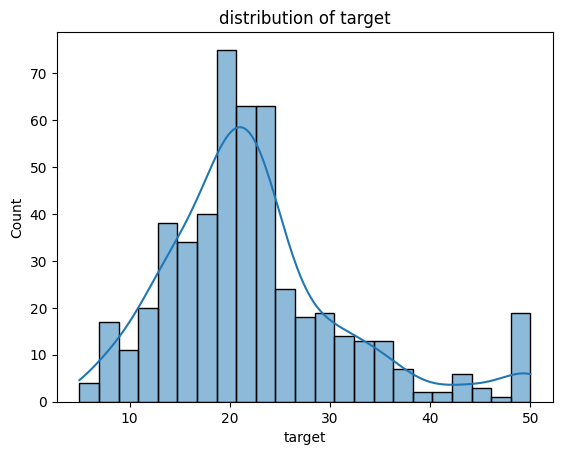

In [41]:
#create histogram
sns.histplot(df['target'], kde = True)
plt.title('distribution of target')
plt.show()

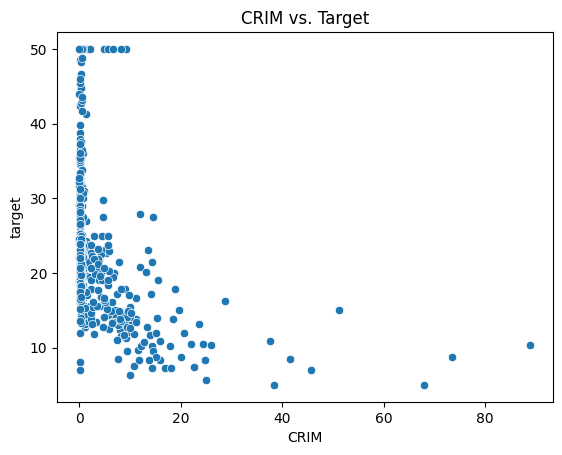

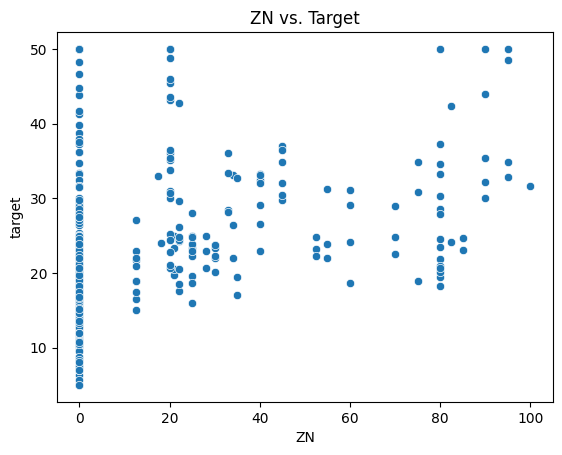

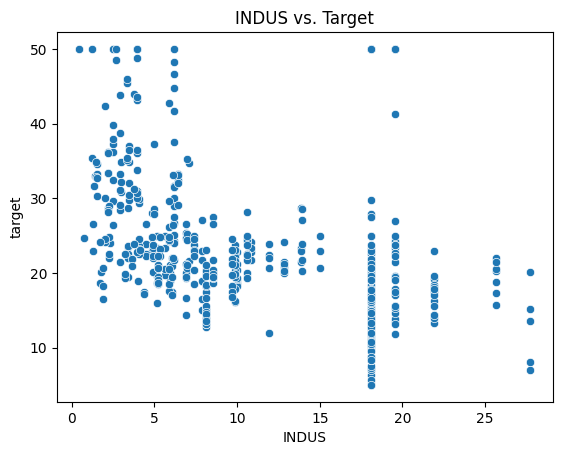

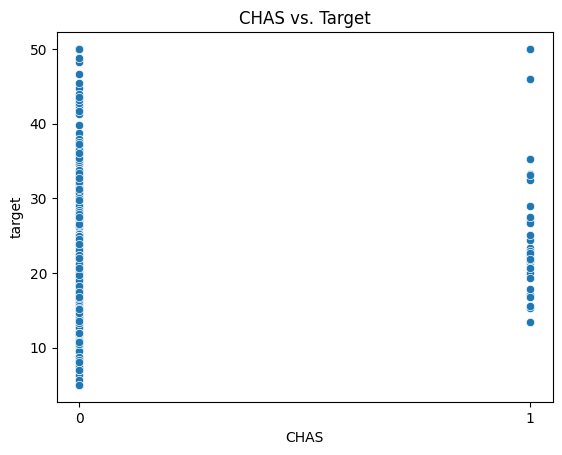

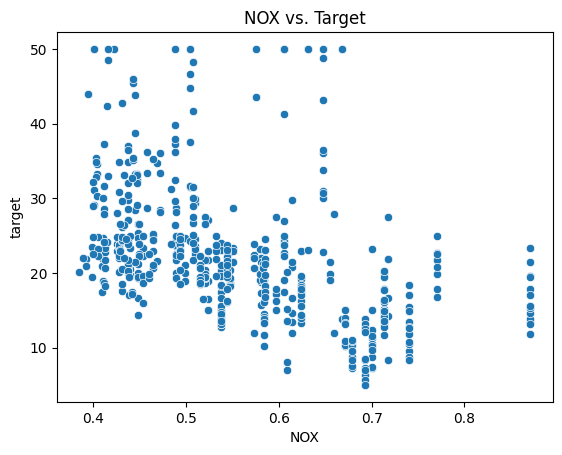

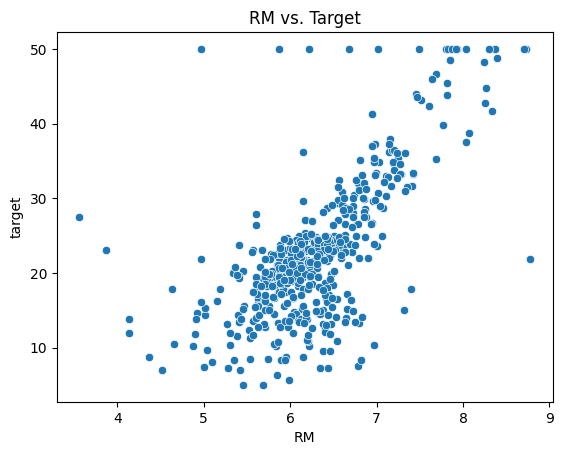

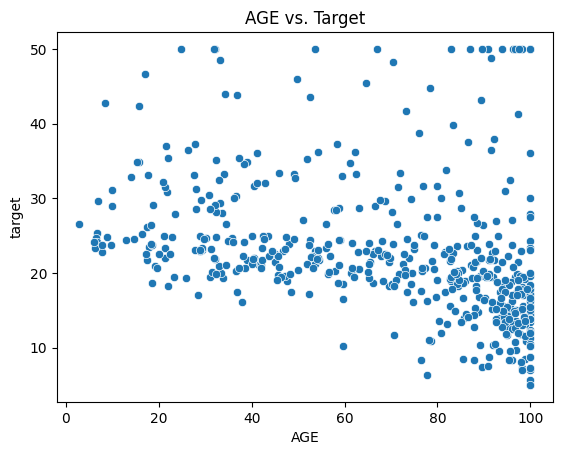

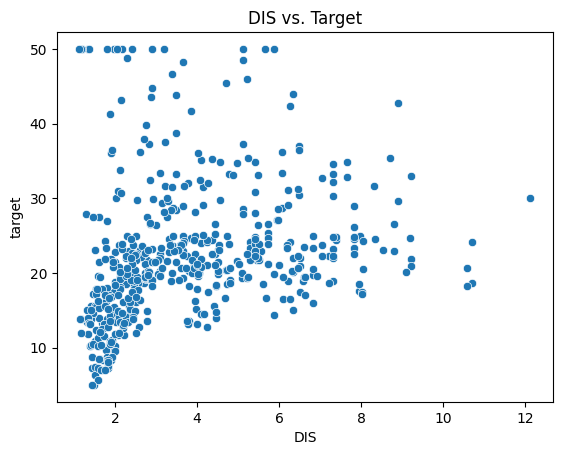

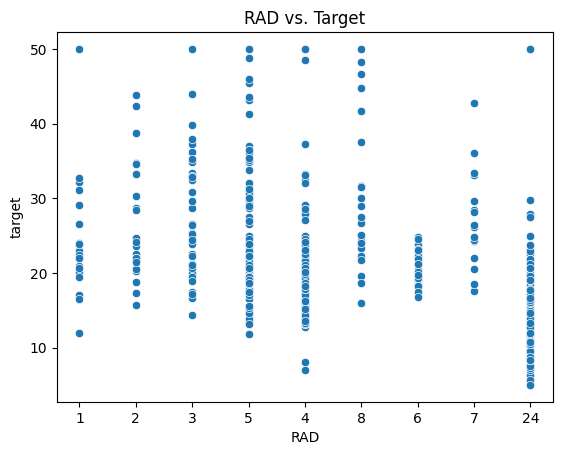

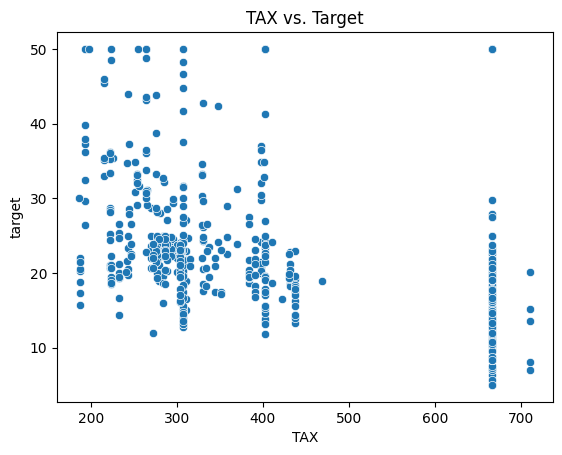

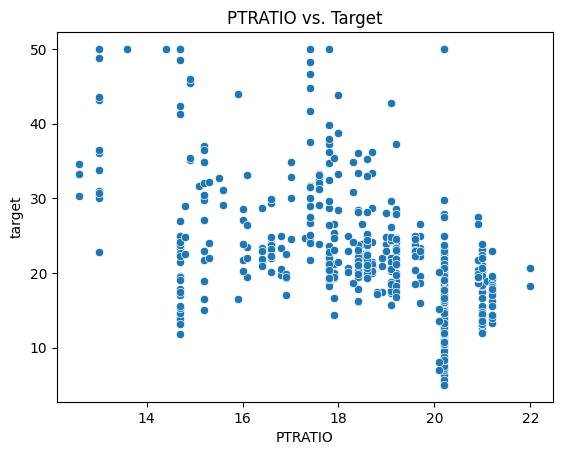

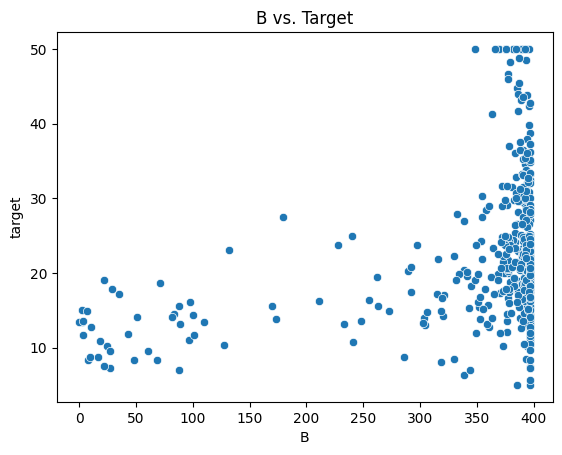

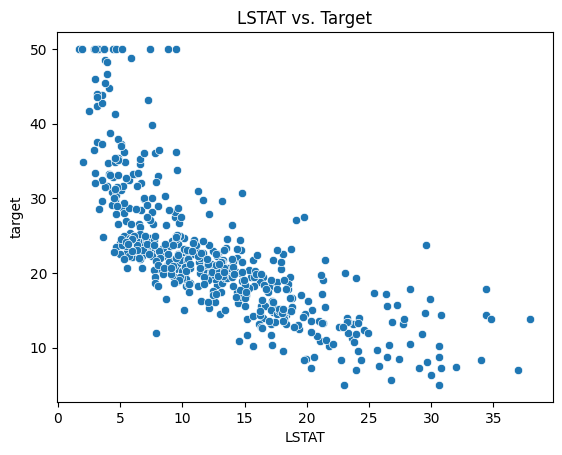

In [47]:
#create scatter plot for each feature againest variable
for feature in boston['feature_names']:
  sns.scatterplot(x = feature, y='target', data = df)
  plt.title(f'{feature} vs. Target')
  plt.show()

In [7]:
#inicialize the linear regression model
model = linear_model.LinearRegression()


In [8]:
#spilt the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [9]:
#train the model with our data
model.fit(x_train, y_train)

LinearRegression()

In [10]:
print(model.coef_)

[[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
  -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
   2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
  -5.47113313e-01]]


In [15]:
#print the prediction of our test data
y_pred = model.predict(np.array(x_test))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
print(y_pred)

[[28.64896005]
 [36.49501384]
 [15.4111932 ]
 [25.40321303]
 [18.85527988]
 [23.14668944]
 [17.3921241 ]
 [14.07859899]
 [23.03692679]
 [20.59943345]
 [24.82286159]
 [18.53057049]
 [-6.86543527]
 [21.80172334]
 [19.22571177]
 [26.19191985]
 [20.27733882]
 [ 5.61596432]
 [40.44887974]
 [17.57695918]
 [27.44319095]
 [30.1715964 ]
 [10.94055823]
 [24.02083139]
 [18.07693812]
 [15.934748  ]
 [23.12614028]
 [14.56052142]
 [22.33482544]
 [19.3257627 ]
 [22.16564973]
 [25.19476081]
 [25.31372473]
 [18.51345025]
 [16.6223286 ]
 [17.50268505]
 [30.94992991]
 [20.19201752]
 [23.90440431]
 [24.86975466]
 [13.93767876]
 [31.82504715]
 [42.56978796]
 [17.62323805]
 [27.01963242]
 [17.19006621]
 [13.80594006]
 [26.10356557]
 [20.31516118]
 [30.08649576]
 [21.3124053 ]
 [34.15739602]
 [15.60444981]
 [26.11247588]
 [39.31613646]
 [22.99282065]
 [18.95764781]
 [33.05555669]
 [24.85114223]
 [12.91729352]
 [22.68101452]
 [30.80336295]
 [31.63522027]
 [16.29833689]
 [21.07379993]
 [16.57699669]
 [20.36362

In [21]:
#check the model preformance using MSE
print(np.mean(y_pred - y_test)**2)

MEDV    0.006043
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [34]:
x_array = np.array(x_test) 
y_array = np.array(y_test)
# evaluate the model on the test data
score = model.score(x_array, y_array)

print('R^2 score:', score)

R^2 score: 0.7112260057484936


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
